## Imports

In [1]:
%cd ..
import sys
sys.path.append('./exploration')

e:\Kerjaan\Kuliah\Tugas Akhir


## Data Exploration

In [2]:
import h5py
import numpy as np
import pandas as pd
from utils import s2f, read_from_csv_custom 

C:\Users\belmi\anaconda3\envs\tugas-akhir\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset TA

#### Several findings
<li> Dalam pemakaian data, cukup digunakan train_2 dan key_2 saja
<li> NaN dan 0 tidak dibedakan, jadi arti dari NaN mungkin karena memang webpagenya belum ada atau karena memang 0 views

In [3]:
train_2 = pd.read_csv('./data/web-traffic-time-series-forecasting/train_2.csv')

In [4]:
print(len(train_2))
train_2.head(5)

145063


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [19]:
dictionary = {}
print(set([x.split('.org_')[-1].split('_')[1] for x in train_2['Page'].tolist()]))

{'spider', 'all-agents'}


### Dataset Paper - metr-LA

In [6]:
with h5py.File('./data/metr-la/metr-la.h5', 'r') as h5_file:
    df = h5_file.get('df')
    axis0 = np.array(df['axis0'], dtype=df['axis0'].dtype)
    axis1 = np.array(df['axis1'], dtype=df['axis1'].dtype)
    block0_items = np.array(df['block0_items'], dtype=df['block0_items'].dtype)
    block0_values = np.array(df['block0_values'], dtype=df['block0_values'].dtype)
    
    axis0 = s2f(axis0, int)
    block0_items = s2f(block0_items, int)
    
metr_la = pd.DataFrame(block0_values, index=axis1, columns=axis0)
metr_la

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
1330560000000000000,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
1330560300000000000,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
1330560600000000000,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
1330560900000000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1330561200000000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340840100000000000,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
1340840400000000000,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
1340840700000000000,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
1340841000000000000,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


### Dataset Paper - PeMS-M

In [7]:
pems_m = pd.read_csv('./data/PeMS-M/PeMS-M/V_228.csv', header=None)
pems_m

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,71.1,66.0,64.6,65.6,67.1,71.9,68.6,67.7,65.8,40.9,...,69.1,70.9,65.0,64.5,66.6,66.6,65.0,69.3,67.7,68.9
1,68.1,66.8,61.7,66.7,64.5,71.6,72.3,64.9,65.6,40.1,...,70.6,65.4,65.0,64.9,65.1,67.7,65.0,67.7,68.8,68.8
2,68.0,64.3,66.6,68.7,68.1,70.5,70.2,61.7,63.4,39.6,...,72.2,70.5,65.0,64.7,66.7,68.9,65.0,70.2,69.1,68.7
3,68.3,67.8,65.9,66.6,67.9,70.3,69.8,67.6,63.2,37.6,...,71.2,69.7,65.0,65.2,67.2,66.9,65.0,70.4,67.3,69.0
4,68.9,69.5,61.2,67.4,64.0,68.1,67.0,66.7,64.2,36.8,...,71.3,65.8,65.0,66.3,66.7,66.2,65.0,68.0,67.4,68.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,70.3,65.9,70.2,62.1,66.8,66.0,64.0,64.8,24.6,66.5,...,66.0,55.6,29.9,63.8,64.5,62.8,3.8,70.2,68.1,19.3
12668,69.9,54.0,68.2,62.2,67.4,65.8,64.4,61.3,35.1,69.2,...,66.8,62.8,29.9,62.9,66.6,63.0,3.5,68.2,68.3,18.9
12669,68.9,37.9,68.8,66.3,69.4,66.6,65.0,60.1,38.5,68.7,...,66.4,65.4,29.9,66.3,68.1,62.6,3.5,68.7,67.5,19.7
12670,69.2,37.8,68.7,63.6,68.5,66.2,64.1,60.9,40.5,68.5,...,67.6,68.9,30.2,64.8,68.2,63.1,3.7,67.7,67.4,19.5


## Data Preprocessing - TA

In [8]:
import tqdm
import pickle
import pandas as pd
from tqdm.contrib.concurrent import thread_map
from utils import get_total_visits, get_wiki_parameters, requests_wikimedia_api, get_visits_from_responses

### Data Cleaning

Pada proses ini akan dilakukan pemilihan beberapa <i> wikipedia pages </i> yang akan digunakan. <i> Wikipedia pages </i> akan dipilih jika total <i> visits </i>nya melebihi 1.000.000.

In [9]:
train_2 = train_2[train_2['Page'].str.contains('ja.wikipedia')]
train_2 = train_2[train_2['Page'].str.contains('all-access_all-agents')]
train_2

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
118685,24_-TWENTY_FOUR-_ja.wikipedia.org_all-access_a...,1911.0,1625.0,1835.0,2899.0,2605.0,2099.0,1876.0,1863.0,1530.0,...,1524.0,2755.0,3247.0,2327.0,1988.0,1890.0,1790.0,2039.0,3689.0,4037.0
118686,91Days_ja.wikipedia.org_all-access_all-agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,241.0,346.0,337.0,275.0,272.0,582.0,380.0,293.0,328.0,290.0
118687,A-Studio_ja.wikipedia.org_all-access_all-agents,227.0,222.0,1137.0,869.0,480.0,505.0,295.0,252.0,301.0,...,674.0,366.0,215.0,205.0,150.0,185.0,178.0,1142.0,399.0,282.0
118688,AAAA_ja.wikipedia.org_all-access_all-agents,51.0,36.0,48.0,36.0,28.0,66.0,52.0,40.0,50.0,...,55.0,26.0,25.0,58.0,63.0,54.0,40.0,60.0,34.0,24.0
118689,AKB48_ja.wikipedia.org_all-access_all-agents,4961.0,4787.0,4622.0,8666.0,6978.0,4950.0,4915.0,4822.0,4369.0,...,4112.0,4021.0,3655.0,3193.0,3703.0,3058.0,2975.0,2969.0,3257.0,3963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123686,Taka_(ONE_OK_ROCKのメンバー)_ja.wikipedia.org_all-a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2456.0,2652.0,2188.0,1598.0,1529.0,1565.0,2758.0,3047.0,1997.0,2204.0
123687,ミス・ペレグリンと奇妙なこどもたち_(映画)_ja.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,666.0,710.0,485.0,492.0,527.0,511.0,524.0,667.0,742.0
123688,真昼の悪魔_ja.wikipedia.org_all-access_all-agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,83.0,85.0,78.0,68.0,78.0,71.0,67.0,95.0,60.0
123689,TWICE_(韓国の音楽グループ)_ja.wikipedia.org_all-access_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3015.0,3654.0,3620.0,3030.0,2998.0,3115.0,2918.0,3005.0,3454.0,3560.0


In [10]:
jawiki_page_columns = ['page_id', 'page_title', 'page_is_redirect', 'page_is_new', 'page_touched']
jawiki_page = read_from_csv_custom('./data/web-traffic-time-series-forecasting/jawiki_page.csv', columns=jawiki_page_columns)
jawiki_page

,page_id,page_title,page_is_redirect,page_is_new,page_touched
0,305230,!,1,0,20220108134714
1,1896353,!!,1,1,20220108134714
2,617718,!!!,0,0,20220116122939
3,4205822,!!!!!!!!/君という仮説,0,0,20220121171137
4,625023,!!!Fuck_You!!!,0,0,20211208143414
...,...,...,...,...,...
2123484,4356705,￫,1,1,20220116005413
2123485,4356706,￬,1,1,20220116005413
2123486,4356707,￭,1,1,20220119020943
2123487,4356708,￮,1,1,20220131114623


In [11]:
with open('./data/web-traffic-time-series-forecasting/nodes_cropped.pickle', 'rb') as file:
    nodes_cropped = pickle.load(file)

with open('./data/web-traffic-time-series-forecasting/adj_list_cropped.pickle', 'rb') as file:
    adj_list = pickle.load(file)

In [12]:
used_pages = [x.split('_ja.wikipedia')[0] for x in train_2['Page'].tolist()]
used_pages_df = jawiki_page[jawiki_page['page_title'].isin(used_pages)]
used_pages_df['page_id'] = used_pages_df['page_id'].astype('int32')
used_pages = [x for x in used_pages_df['page_id'].astype('int32').tolist() if x in nodes_cropped]
used_pages_df = used_pages_df[used_pages_df['page_id'].isin(used_pages)]
used_pages_df

/tmp/ipykernel_11771/1938781029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_pages_df['page_id'] = used_pages_df['page_id'].astype('int32')


,page_id,page_title,page_is_redirect,page_is_new,page_touched
1528,3277927,007_スペクター,0,0,20220217194413
2692,11302,100メートル競走,0,0,20220219072008
3880,2830,11月11日,0,0,20220219143045
4485,2963405,12歳。,0,0,20220216225135
20821,1069779,2007年,0,0,20220219143122
...,...,...,...,...,...
2120384,212528,黒羽快斗,0,0,20220219143102
2121821,2762370,齋藤飛鳥,0,0,20220219143147
2121863,538780,龍が如く,0,0,20220216114450
2121891,4080358,龍が如くシリーズの登場人物,0,0,20220219014539


In [13]:
train_2['Page Title'] = train_2['Page'].str.split(pat='_ja.wikipedia', expand=True).iloc[:, 0]
train_2 = train_2[train_2['Page Title'].isin(used_pages_df['page_title'].tolist())].fillna(0)
train_2

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,Page Title
118685,24_-TWENTY_FOUR-_ja.wikipedia.org_all-access_a...,1911.0,1625.0,1835.0,2899.0,2605.0,2099.0,1876.0,1863.0,1530.0,...,2755.0,3247.0,2327.0,1988.0,1890.0,1790.0,2039.0,3689.0,4037.0,24_-TWENTY_FOUR-
118686,91Days_ja.wikipedia.org_all-access_all-agents,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,346.0,337.0,275.0,272.0,582.0,380.0,293.0,328.0,290.0,91Days
118687,A-Studio_ja.wikipedia.org_all-access_all-agents,227.0,222.0,1137.0,869.0,480.0,505.0,295.0,252.0,301.0,...,366.0,215.0,205.0,150.0,185.0,178.0,1142.0,399.0,282.0,A-Studio
118689,AKB48_ja.wikipedia.org_all-access_all-agents,4961.0,4787.0,4622.0,8666.0,6978.0,4950.0,4915.0,4822.0,4369.0,...,4021.0,3655.0,3193.0,3703.0,3058.0,2975.0,2969.0,3257.0,3963.0,AKB48
118690,AKIBA'S_TRIP_ja.wikipedia.org_all-access_all-a...,252.0,237.0,196.0,197.0,249.0,224.0,237.0,202.0,207.0,...,206.0,184.0,161.0,164.0,128.0,160.0,207.0,201.0,201.0,AKIBA'S_TRIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123677,嫌われる勇気_ja.wikipedia.org_all-access_all-agents,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,463.0,455.0,528.0,537.0,434.0,437.0,399.0,395.0,387.0,嫌われる勇気
123681,突然ですが、明日結婚します_ja.wikipedia.org_all-access_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,415.0,360.0,318.0,329.0,340.0,325.0,384.0,482.0,361.0,突然ですが、明日結婚します
123686,Taka_(ONE_OK_ROCKのメンバー)_ja.wikipedia.org_all-a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2652.0,2188.0,1598.0,1529.0,1565.0,2758.0,3047.0,1997.0,2204.0,Taka_(ONE_OK_ROCKのメンバー)
123687,ミス・ペレグリンと奇妙なこどもたち_(映画)_ja.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,666.0,710.0,485.0,492.0,527.0,511.0,524.0,667.0,742.0,ミス・ペレグリンと奇妙なこどもたち_(映画)


In [14]:
train_2_total = get_total_visits(train_2).sort_values('Total', ascending=False).iloc[:500, :]
train_2_total

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,Page Title,Total
121159,星野源_ja.wikipedia.org_all-access_all-agents,4768.0,7203.0,5613.0,6859.0,5618.0,4121.0,3693.0,3831.0,5235.0,...,4682.0,4124.0,4071.0,3569.0,3932.0,3728.0,5987.0,6754.0,星野源,12128337.0
119625,真田信繁_ja.wikipedia.org_all-access_all-agents,2211.0,2097.0,2650.0,3209.0,2615.0,2270.0,2270.0,2339.0,3471.0,...,1978.0,1590.0,1476.0,1559.0,1532.0,1381.0,1831.0,2682.0,真田信繁,11398787.0
122391,高橋一生_ja.wikipedia.org_all-access_all-agents,758.0,696.0,751.0,934.0,805.0,726.0,684.0,56740.0,6676.0,...,10948.0,13348.0,8775.0,10954.0,11654.0,9050.0,10063.0,7054.0,高橋一生,7899086.0
122511,菅田将暉_ja.wikipedia.org_all-access_all-agents,2096.0,2210.0,2864.0,4538.0,3970.0,29503.0,5782.0,7519.0,3384.0,...,6578.0,6309.0,6353.0,5578.0,4816.0,4729.0,5076.0,5313.0,菅田将暉,7802791.0
120681,進撃の巨人_ja.wikipedia.org_all-access_all-agents,10844.0,10926.0,12884.0,17561.0,14647.0,11387.0,9970.0,10011.0,8887.0,...,6650.0,5271.0,4717.0,4836.0,5209.0,5680.0,5673.0,5905.0,進撃の巨人,7790101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121505,橋本奈々未_ja.wikipedia.org_all-access_all-agents,902.0,1325.0,1605.0,1870.0,1846.0,1520.0,1266.0,1467.0,1242.0,...,1682.0,1246.0,1319.0,1376.0,1334.0,1359.0,1680.0,1899.0,橋本奈々未,2002673.0
122941,南條愛乃_ja.wikipedia.org_all-access_all-agents,2637.0,2750.0,2841.0,3457.0,3335.0,2982.0,3015.0,2655.0,2716.0,...,1967.0,1621.0,1391.0,1468.0,1457.0,1531.0,1734.0,1506.0,南條愛乃,2001315.0
122997,バケモノの子_ja.wikipedia.org_all-access_all-agents,1936.0,3047.0,13296.0,10158.0,6844.0,5439.0,5195.0,6332.0,7237.0,...,601.0,484.0,441.0,403.0,394.0,394.0,530.0,480.0,バケモノの子,1998491.0
122996,始皇帝_ja.wikipedia.org_all-access_all-agents,3560.0,3978.0,3932.0,4150.0,4194.0,3700.0,3603.0,3940.0,4731.0,...,2305.0,2241.0,1968.0,1937.0,2212.0,1962.0,2120.0,2090.0,始皇帝,1995791.0


### Data Scraping & Further Cleaning

Pada bagian ini akan dilakukan scraping agar data yang digunakan semakin banyak. Selanjutnya jika terdapat <i> site</i> yang gagal di-<i>request</i>, <i>site</i> tersebut akan dihapus dari <b>DataFrame</b>.

In [15]:
temp_df_dict = train_2_total.drop(columns='Total').set_index('Page').to_dict(orient='index')
wiki_parameters = [get_wiki_parameters(parameter_str) for parameter_str in train_2_total['Page'].tolist()]
responses = thread_map(requests_wikimedia_api, wiki_parameters, tqdm_class=tqdm.tqdm, max_workers=24)
formatted_responses = get_visits_from_responses(responses)

100%|██████████| 500/500 [00:29<00:00, 17.21it/s]


In [16]:
api_not_found_counter = 0
for path in temp_df_dict.copy().keys():
    from_df = temp_df_dict[path]

    try:
        from_api = formatted_responses[path]
    except:
        api_not_found_counter += 1
        del temp_df_dict[path]
        continue

    if from_api['2017-09-10'] != from_df['2017-09-10']:
        from_api_assertion = from_api['2017-09-10']
        from_df_assertion = from_df['2017-09-10']
        continue

    for api_date in from_api.keys():
        temp_df_dict[path][api_date] = from_api[api_date]
print(f'{api_not_found_counter} API(s) not found!')

3 API(s) not found!


In [23]:
ta_final = pd.DataFrame.from_dict(temp_df_dict).T.reset_index().rename(columns={'index':'Page'})
ta_final.fillna(0, inplace=True)
date_columns = [x for x in ta_final.columns if 'Page' not in x]
ta_final = ta_final[['Page', 'Page Title'] + date_columns]
ta_final.to_csv('./data/web-traffic-time-series-forecasting/data_ta_final.csv', index=False)
ta_final

,Page,Page Title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,...,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,星野源_ja.wikipedia.org_all-access_all-agents,星野源,4768.0,7203.0,5613.0,6859.0,5618.0,4121.0,3693.0,3831.0,...,2171,11745,3584,3030,2175,2398,2665,2966,35483,7100
1,真田信繁_ja.wikipedia.org_all-access_all-agents,真田信繁,2211.0,2097.0,2650.0,3209.0,2615.0,2270.0,2270.0,2339.0,...,969,1297,1119,1392,1076,1168,1255,4025,1676,1314
2,高橋一生_ja.wikipedia.org_all-access_all-agents,高橋一生,758.0,696.0,751.0,934.0,805.0,726.0,684.0,56740.0,...,1376,6225,9465,3893,5826,5592,7764,7922,4648,3364
3,菅田将暉_ja.wikipedia.org_all-access_all-agents,菅田将暉,2096.0,2210.0,2864.0,4538.0,3970.0,29503.0,5782.0,7519.0,...,3651,5259,7726,7817,3926,3894,3606,4089,6099,5344
4,進撃の巨人_ja.wikipedia.org_all-access_all-agents,進撃の巨人,10844.0,10926.0,12884.0,17561.0,14647.0,11387.0,9970.0,10011.0,...,3402,3120,3675,3634,3120,3101,3334,3341,3567,4201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,橋本奈々未_ja.wikipedia.org_all-access_all-agents,橋本奈々未,902.0,1325.0,1605.0,1870.0,1846.0,1520.0,1266.0,1467.0,...,551,647,679,709,527,685,714,893,1893,1134
493,南條愛乃_ja.wikipedia.org_all-access_all-agents,南條愛乃,2637.0,2750.0,2841.0,3457.0,3335.0,2982.0,3015.0,2655.0,...,641,662,905,698,538,586,655,741,680,1198
494,バケモノの子_ja.wikipedia.org_all-access_all-agents,バケモノの子,1936.0,3047.0,13296.0,10158.0,6844.0,5439.0,5195.0,6332.0,...,218,250,316,248,201,245,266,239,445,327
495,始皇帝_ja.wikipedia.org_all-access_all-agents,始皇帝,3560.0,3978.0,3932.0,4150.0,4194.0,3700.0,3603.0,3940.0,...,2289,1931,1877,1800,1574,1576,1774,1656,1929,2986


## Data Preprocessing - Model

Di bagian ini hanya akan dilakukan pembentukan beberapa calon <i> adjacency matrix </i> menurut <a href="https://arxiv.org/abs/1211.0053"> paper ini</a>.

In [5]:
import os
import pickle

import numpy as np
import pandas as pd

from utils import Graph, read_from_csv_custom, create_adj_from_mapping

In [6]:
graph = Graph()
graph.read_from_file(adjacency_list_filename='./data/web-traffic-time-series-forecasting/adj_list_cropped.pickle', node_list_filename='./data/web-traffic-time-series-forecasting/nodes_cropped.pickle')

FileNotFoundError: [Errno 2] No such file or directory: './data/web-traffic-time-series-forecasting/nodes_cropped.pickle'

In [7]:
ta_final = pd.read_csv('./data/web-traffic-time-series-forecasting/data_ta_final.csv')
ta_final.head()

,Page,Page Title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,...,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,星野源_ja.wikipedia.org_all-access_all-agents,星野源,4768.0,7203.0,5613.0,6859.0,5618.0,4121.0,3693.0,3831.0,...,2171,11745,3584,3030,2175,2398,2665,2966,35483,7100
1,真田信繁_ja.wikipedia.org_all-access_all-agents,真田信繁,2211.0,2097.0,2650.0,3209.0,2615.0,2270.0,2270.0,2339.0,...,969,1297,1119,1392,1076,1168,1255,4025,1676,1314
2,高橋一生_ja.wikipedia.org_all-access_all-agents,高橋一生,758.0,696.0,751.0,934.0,805.0,726.0,684.0,56740.0,...,1376,6225,9465,3893,5826,5592,7764,7922,4648,3364
3,菅田将暉_ja.wikipedia.org_all-access_all-agents,菅田将暉,2096.0,2210.0,2864.0,4538.0,3970.0,29503.0,5782.0,7519.0,...,3651,5259,7726,7817,3926,3894,3606,4089,6099,5344
4,進撃の巨人_ja.wikipedia.org_all-access_all-agents,進撃の巨人,10844.0,10926.0,12884.0,17561.0,14647.0,11387.0,9970.0,10011.0,...,3402,3120,3675,3634,3120,3101,3334,3341,3567,4201


In [5]:
jawiki_page_columns = ['page_id', 'page_title', 'page_is_redirect', 'page_is_new', 'page_touched']
jawiki_page = read_from_csv_custom('./data/web-traffic-time-series-forecasting/wiki-data/jawiki/jawiki_page.csv', columns=jawiki_page_columns)
jawiki_page

,page_id,page_title,page_is_redirect,page_is_new,page_touched
0,305230,!,1,0,20220108134714
1,1896353,!!,1,1,20220108134714
2,617718,!!!,0,0,20220116122939
3,4205822,!!!!!!!!/君という仮説,0,0,20220121171137
4,625023,!!!Fuck_You!!!,0,0,20211208143414
...,...,...,...,...,...
2123484,4356705,￫,1,1,20220116005413
2123485,4356706,￬,1,1,20220116005413
2123486,4356707,￭,1,1,20220119020943
2123487,4356708,￮,1,1,20220131114623


In [6]:
used_pages = [x.split('_ja.wikipedia')[0] for x in ta_final['Page'].tolist()]
used_pages_df = jawiki_page[jawiki_page['page_title'].isin(used_pages)]
used_pages_df['page_id'] = used_pages_df['page_id'].astype('int32')
used_pages = used_pages_df['page_id'].tolist()
used_pages_df

<ipython-input-6-b966b44995fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_pages_df['page_id'] = used_pages_df['page_id'].astype('int32')


,page_id,page_title,page_is_redirect,page_is_new,page_touched
34770,3729557,3年B組金八先生,0,0,20220219153025
34895,1143214,3月のライオン,0,0,20220210035116
42786,327141,AAA_(音楽グループ),0,0,20220220164831
45345,3386415,AKB48,0,0,20220220155257
49087,15081,AV女優,0,0,20220219150657
...,...,...,...,...,...
2118390,1635548,黒子のバスケ,0,0,20220215183852
2119083,2483322,黒木華,0,0,20220219144650
2119152,1800155,黒柳徹子,0,0,20220220160919
2121891,4080358,龍が如くシリーズの登場人物,0,0,20220219014539


In [7]:
if os.path.exists('./data/web-traffic-time-series-forecasting/adj_mat_dict.pickle'):
    with open('./data/web-traffic-time-series-forecasting/adj_mat_dict.pickle', 'rb') as pickle_file:
        adj_mat_dict = pickle.load(pickle_file)
        page_done = list(adj_mat_dict.keys())
        used_pages = [x for x in used_pages if x not in page_done]
else:
    adj_mat_dict = {}

used_pages_copy = used_pages.copy()
for page in used_pages:
    result = graph.shortest_path(page, end_node=used_pages_copy)
    adj_mat_dict[page] = result

    with open('./data/web-traffic-time-series-forecasting/adj_mat_dict.pickle', 'wb') as pickle_file:
        pickle.dump(adj_mat_dict, pickle_file)

    used_pages_copy.remove(page)

In [8]:
np.random.seed(42)
mapper = {}

for i, key in enumerate(ta_final['Page Title'].tolist()):
    val = used_pages_df[used_pages_df['page_title']==key]['page_id'].item()
    mapper[key] = (i, val)

adj_mat = create_adj_from_mapping(mapper, adj_mat_dict, randomizer=False)
with open('./data/web-traffic-time-series-forecasting/adj_mat_test.pickle', 'wb') as pickle_file:
    pickle.dump(adj_mat, pickle_file)
adj_mat

array([[1.e-04, 2.e+00, 1.e+00, ..., 2.e+00, 2.e+00, 2.e+00],
       [2.e+00, 1.e-04, 2.e+00, ..., 2.e+00, 2.e+00, 2.e+00],
       [1.e+00, 2.e+00, 1.e-04, ..., 2.e+00, 2.e+00, 2.e+00],
       ...,
       [2.e+00, 2.e+00, 2.e+00, ..., 1.e-04, 3.e+00, 2.e+00],
       [2.e+00, 2.e+00, 2.e+00, ..., 3.e+00, 1.e-04, 2.e+00],
       [2.e+00, 2.e+00, 2.e+00, ..., 2.e+00, 2.e+00, 1.e-04]])

In [17]:
with open('./data/web-traffic-time-series-forecasting/adj_mat.pickle', 'rb') as pickle_file:
    adj_mat = pickle.load(pickle_file)
adj_mat_df = pd.DataFrame(adj_mat, index=ta_final['Page'], columns=ta_final['Page'])
adj_mat_df.head().iloc[:, :5]

Page,星野源_ja.wikipedia.org_all-access_all-agents,真田信繁_ja.wikipedia.org_all-access_all-agents,高橋一生_ja.wikipedia.org_all-access_all-agents,菅田将暉_ja.wikipedia.org_all-access_all-agents,進撃の巨人_ja.wikipedia.org_all-access_all-agents
Page,,,,,
星野源_ja.wikipedia.org_all-access_all-agents,0.0001,2.0000,1.0000,1.0000,2.0000
真田信繁_ja.wikipedia.org_all-access_all-agents,2.0000,0.0001,2.0000,2.0000,2.0000
高橋一生_ja.wikipedia.org_all-access_all-agents,1.0000,2.0000,0.0001,1.0000,2.0000
菅田将暉_ja.wikipedia.org_all-access_all-agents,1.0000,2.0000,1.0000,0.0001,2.0000
進撃の巨人_ja.wikipedia.org_all-access_all-agents,2.0000,2.0000,2.0000,2.0000,0.0001


## Simulation

In [83]:
import os

import numpy as np
import pandas as pd
import seaborn as sn

import matplotlib as mpl

from matplotlib import pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
mpl.style.use('ggplot')

In [5]:
def sarima_formatter(df):
    df = df.mean().reset_index()
    df_dict = {'Name': ['SARIMA']}
    for _, row in df.iterrows():
        df_dict[row['index']] = row[0]
    df = pd.DataFrame(df_dict)
    return df

In [48]:
ta_final = pd.read_csv('./data/web-traffic-time-series-forecasting/data_ta_final.csv')

### Short-Time Prediction

In [63]:
st_results = pd.read_csv('./wandb/st_results.csv').drop(columns=['Notes', 'Tags', 'avg_train_loss', 'avg_val_loss', 'monitor']).dropna(axis=1)
sarima_results = pd.read_csv('./model/sarima/training_results.csv')
sarima_results = sarima_formatter(sarima_results)
st_columns = [x for x in sarima_results.columns if '1_' in x] + ['Name']
sarima_results = sarima_results[st_columns]
st_results = pd.concat([st_results, sarima_results]).reset_index(drop=True)
st_results

,Name,Runtime,avg_train_1_step_mae_loss,avg_train_1_step_mape_loss,avg_val_1_step_mae_loss,avg_val_1_step_mape_loss,epoch_time
0,STGCN_30_1,1457.0,740.686462,0.488506,1005.399597,0.381608,51.555212
1,STGCN_14_1,766.0,742.187012,0.497982,947.404602,0.365644,43.808006
2,LSTM_30_1,234.0,685.102051,0.452503,1006.250183,0.397422,36.468049
3,LSTM_14_1,235.0,684.729187,0.447356,968.647156,0.394945,35.485639
4,CLTFP_30_1,236.0,671.510864,0.421004,989.064758,0.380723,36.858199
5,CLTFP_14_1,244.0,672.812988,0.428948,949.845520,0.375742,37.338954
6,SARIMA,NaN,NaN,NaN,787.619093,0.293857,NaN


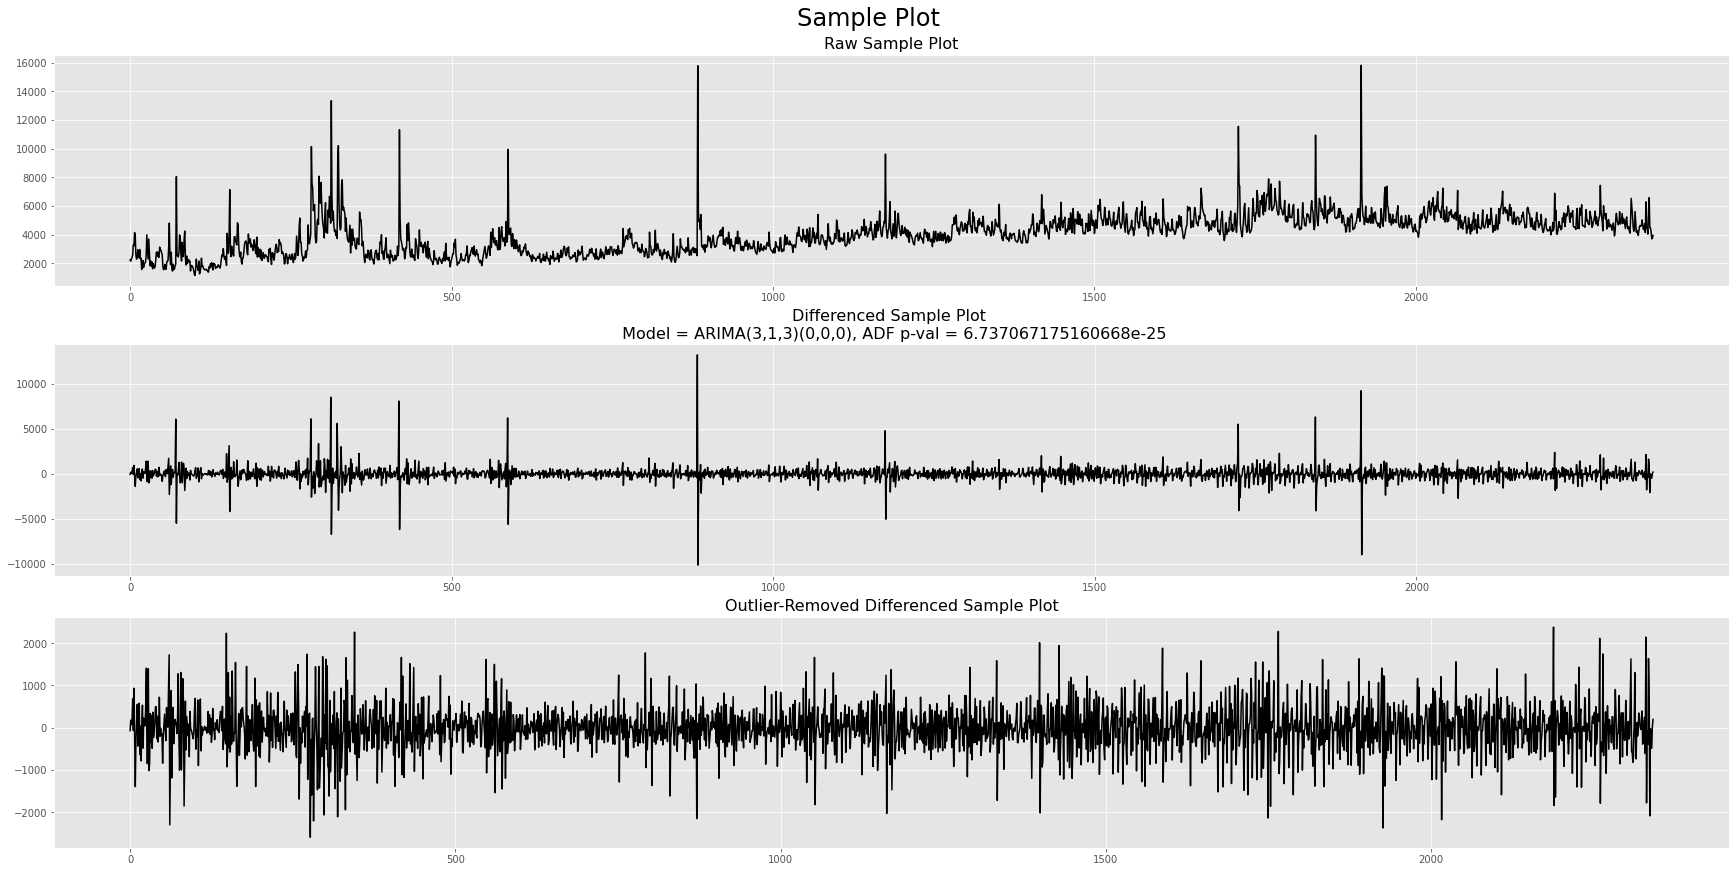

In [35]:
num_samples = 1
fig, ax = plt.subplots(3, 1, figsize=(24, 12), constrained_layout=True)
sample_df = ta_final.sample()

name = sample_df.squeeze()[0]
_, y = list(zip(*list(sample_df.squeeze()[2:].items())))
y = np.array(y[:-7])

ax[0].plot(y, c='black')
ax[0].set_title('Raw Sample Plot', fontsize=16)

model = auto_arima(y)
diff = model.get_params()['order'][1]

y_diff = np.diff(y, diff)
p_val = adfuller(y_diff)[1]
title_text = f'Differenced Sample Plot \n Model = {str(model).strip()[:-3]}, ADF p-val = {p_val}'

ax[1].plot(y_diff, c='black')
ax[1].set_title(title_text, fontsize=16)

y_diff_clean = y_diff[np.abs(y_diff) < 3*y_diff.std()]
ax[2].plot(y_diff_clean, c='black')
ax[2].set_title('Outlier-Removed Differenced Sample Plot', fontsize=16)

fig.suptitle('Sample Plot', fontsize=24)
plt.show()

### Long-Time Prediction

In [66]:
lt_results = pd.read_csv('./wandb/lt_results.csv').drop(columns=['Notes', 'Tags', 'avg_train_loss', 'avg_val_loss', 'monitor']).dropna(axis=1)
sarima_results = pd.read_csv('./model/sarima/training_results.csv')
sarima_results = sarima_formatter(sarima_results)
lt_results = pd.concat([lt_results, sarima_results]).reset_index(drop=True)
lt_results

,Name,State,User,Created,Runtime,avg_train_1_step_mae_loss,avg_train_1_step_mape_loss,avg_train_2_step_mae_loss,avg_train_2_step_mape_loss,avg_train_3_step_mae_loss,...,avg_val_3_step_mape_loss,avg_val_4_step_mae_loss,avg_val_4_step_mape_loss,avg_val_5_step_mae_loss,avg_val_5_step_mape_loss,avg_val_6_step_mae_loss,avg_val_6_step_mape_loss,avg_val_7_step_mae_loss,avg_val_7_step_mape_loss,epoch_time
0,STGCN_30_7,finished,mikhaelbelmiro,2022-05-05T13:31:51.000Z,392.0,741.723633,0.497584,739.905457,0.495199,739.830261,...,0.369230,895.426453,0.376673,905.404236,0.375420,1001.532471,0.376328,1029.045776,0.382594,55.198366
1,STGCN_14_7,finished,mikhaelbelmiro,2022-05-05T13:13:04.000Z,622.0,739.880981,0.497680,737.684021,0.497459,736.687805,...,0.388165,904.192078,0.384512,903.483704,0.376125,1010.172058,0.383446,1031.894287,0.385933,70.911977
2,LSTM_30_7,finished,mikhaelbelmiro,2022-05-05T13:38:32.000Z,264.0,707.552124,0.494262,724.402527,0.508016,725.915161,...,0.410833,973.473328,0.437919,1014.378052,0.459764,1127.013672,0.478680,1153.461182,0.485386,42.404608
3,LSTM_14_7,finished,mikhaelbelmiro,2022-05-05T13:23:33.000Z,239.0,707.152710,0.482216,724.435181,0.506434,726.416199,...,0.405039,957.307007,0.423809,987.353638,0.442086,1108.347900,0.461695,1139.419189,0.473322,37.346027
4,CLTFP_30_7,finished,mikhaelbelmiro,2022-05-05T13:43:06.000Z,303.0,663.673340,0.417170,645.877014,0.384201,697.122925,...,0.423947,940.722412,0.404859,971.017395,0.414929,1050.616699,0.403534,1133.365356,0.446879,41.234427
5,CLTFP_14_7,finished,mikhaelbelmiro,2022-05-05T13:27:39.000Z,244.0,658.169556,0.382757,651.062256,0.382588,672.259094,...,0.415074,942.602722,0.418604,915.666138,0.386324,1048.337280,0.409584,1090.064819,0.428811,37.769674
6,SARIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508159,941.763547,0.492406,1176.739967,0.490008,3180.972496,0.493470,1511.470639,0.521131,NaN


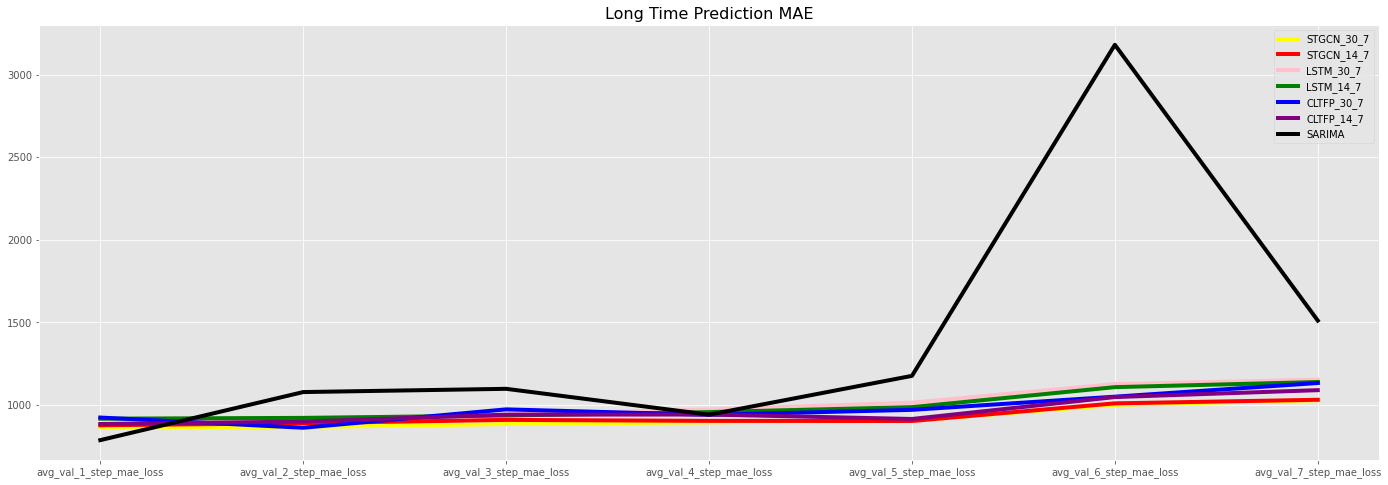

In [67]:
mae_lt_val_results = lt_results[['Name']+[col for col in lt_results.columns if 'mae' in col and 'val' in col]]
colors = ['yellow', 'red', 'pink', 'green', 'blue', 'purple', 'black']

fig, ax = plt.subplots(1, 1, figsize=(24, 8))
for i, row in mae_lt_val_results.iterrows():
    name = row['Name']
    x, y = list(zip(*list(row[1:].items())))
    ax.plot(x, y, label=name, linewidth=4, color=colors[i])

ax.set_title('Long Time Prediction MAE', fontsize=16)
ax.legend()
plt.show()

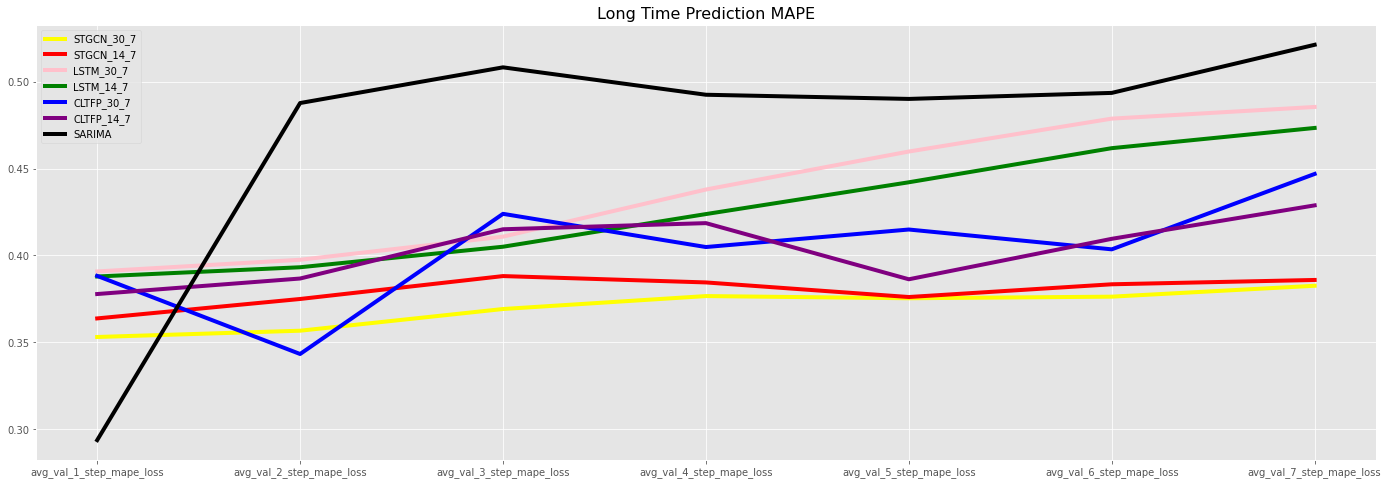

In [68]:
mape_lt_val_results = lt_results[['Name']+[col for col in lt_results.columns if 'mape' in col and 'val' in col]]
colors = ['yellow', 'red', 'pink', 'green', 'blue', 'purple', 'black']

fig, ax = plt.subplots(1, 1, figsize=(24, 8))
for i, row in mape_lt_val_results.iterrows():
    name = row['Name']
    x, y = list(zip(*list(row[1:].items())))
    ax.plot(x, y, label=name, linewidth=4, color=colors[i])

ax.set_title('Long Time Prediction MAPE', fontsize=16)
ax.legend()
plt.show()

### Runtime

In [79]:
st_runtime = st_results[['Name', 'epoch_time']].dropna()
lt_runtime = lt_results[['Name', 'epoch_time']].dropna()

Text(0.5, 0.98, 'Rata - Rata Training 1 Epoch')

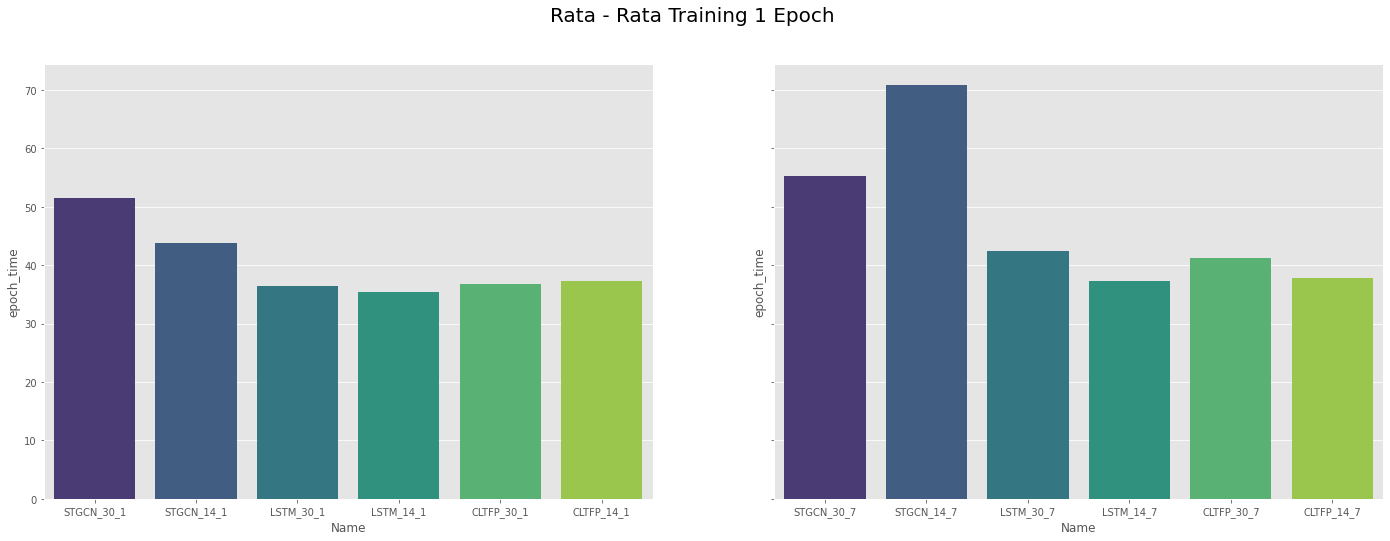

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8), sharey=True)
sn.barplot(data=st_runtime, x='Name', y='epoch_time', ax=ax[0], palette='viridis')
sn.barplot(data=lt_runtime, x='Name', y='epoch_time', ax=ax[1], palette='viridis')
fig.suptitle('Rata - Rata Training 1 Epoch', fontsize=20)

### Total Runtime

In [3]:
%cd ..

e:\Kerjaan\Kuliah\Tugas Akhir


In [42]:
import os

import pandas as pd
import seaborn as sn
import matplotlib as mpl

from matplotlib import pyplot as plt

mpl.style.use('ggplot')

In [43]:
total_runtime_dict = {
    'model': [],
    'runtime': []
}
for folder in os.listdir('./model'):
    if folder == 'sarima':
        continue
    for model in os.listdir(f'./model/{folder}'):
        temp_df = pd.read_csv(f'./model/{folder}/{model}/training_results.csv')
        total_runtime_dict['model'].append(f'{model}_{folder}'.upper())
        total_runtime_dict['runtime'].append(sum(temp_df['epoch_time']))

with open('./model/sarima/training_time.txt', 'r') as file:
    for line in file:
        sarima_training_time = float(line)
current_len = len(pd.read_csv('./model/sarima/training_results.csv'))
total_runtime_dict['model'].append('SARIMA')
total_runtime_dict['runtime'].append(sarima_training_time*(497/current_len))

In [44]:
total_runtime_df = pd.DataFrame(total_runtime_dict)
total_runtime_df

,model,runtime
0,CLTFP_14_1,192.865227
1,LSTM_14_1,187.016077
2,STGCN_14_1,710.026040
3,CLTFP_14_7,191.179680
4,LSTM_14_7,189.823598
5,STGCN_14_7,545.285506
6,CLTFP_30_1,187.643111
7,LSTM_30_1,186.602233
8,STGCN_30_1,1394.461123
9,CLTFP_30_7,249.304899


Text(0.5, 0.98, 'Total Training Time')

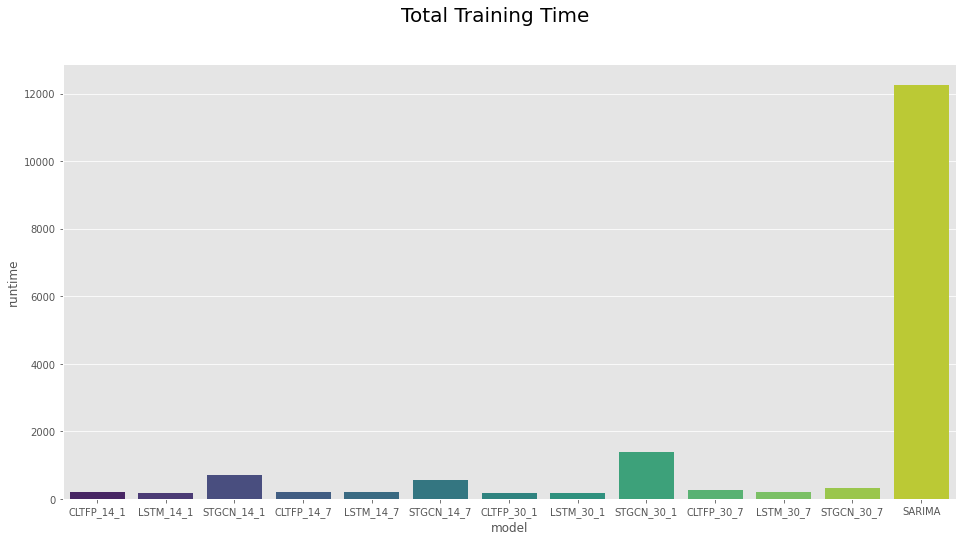

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharey=True)
sn.barplot(data=total_runtime_df, x='model', y='runtime', ax=ax, palette='viridis')
fig.suptitle('Total Training Time', fontsize=20)